### Summary of this Notebook

Get an intuition for which high level substrates to retain to train the supervised model. 

Four deciding criteria for selecting the high level substrates: 

1. Frequency (sample size)
2. Variation in the lengths of the gene sequences. 
3. Number of unique low level substrates. 
4. Variation in the gene composition of the sequences. 

#### Frequency (sample size)

In [90]:
import pandas as pd

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
# set the directory to where the data is
import os

os.chdir(r"D:\Gene_Project")

In [93]:
# load the data - new data that was provided
data = pd.read_csv(r"pul_seq_low_high_substr_year_corrected.csv")

In [94]:
# get the frequency counts
D = data.high_level_substr.value_counts()

In [95]:
# convert to a dictionary
D = dict(D)

In [96]:
# import the plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt

In [97]:
# some parameters for improved plotting aesthetics
mpl.rcParams['xtick.labelsize'] = 15 
plt.rcParams["font.weight"] = "bold"

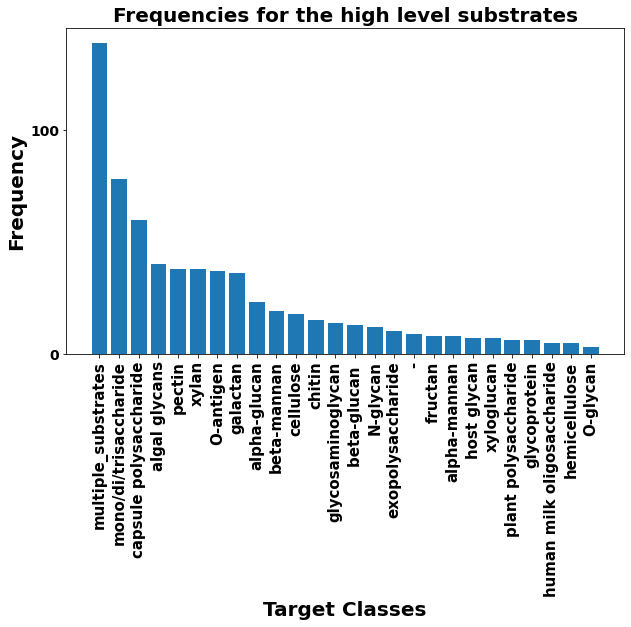

In [98]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(range(len(D)), list(D.values()), align='center')
# put the labels but rotate them
plt.xticks(range(len(D)), list(D.keys()), rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Frequency", weight = "bold", fontsize = 20)
# put the title
plt.title("Frequencies for the high level substrates", weight = "bold", fontsize = 20)
plt.show()

In [99]:
frequency_df = pd.DataFrame({"high_level_substr" : D.keys(), "frequency" : D.values()})

#### Variation in the lengths of the gene sequences.

In [100]:
data["length"] = [len(seq.replace("|",",").split(",")) for seq in data["sig_gene_seq"]]

In [101]:
D = dict(data.groupby("high_level_substr")["length"].std().reindex(D.keys()))

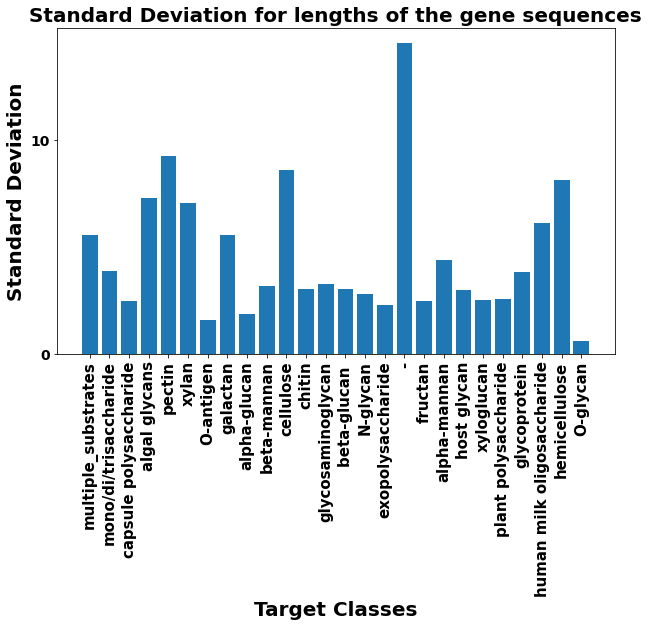

In [102]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(range(len(D)), list(D.values()), align='center')
# put the labels but rotate them
plt.xticks(range(len(D)), list(D.keys()), rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Standard Deviation", weight = "bold", fontsize = 20)
# put the title
plt.title("Standard Deviation for lengths of the gene sequences", weight = "bold", fontsize = 20)
plt.show()

In [103]:
std_len_df = pd.DataFrame({"high_level_substr" : D.keys(), "std_length" : D.values()})

#### Number of unique low level substrates

In [104]:
D = dict(data.groupby("high_level_substr")["low_level_substr"].nunique().reindex(D.keys()))

In [105]:
unique_df = pd.DataFrame({"high_level_substr" : D.keys(), "number_unique" : D.values()})

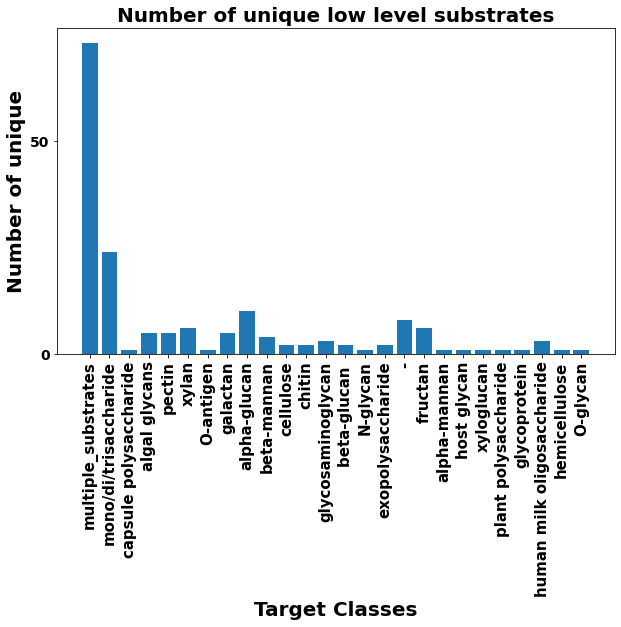

In [106]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(range(len(D)), list(D.values()), align='center')
# put the labels but rotate them
plt.xticks(range(len(D)), list(D.keys()), rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Number of unique", weight = "bold", fontsize = 20)
# put the title
plt.title("Number of unique low level substrates", weight = "bold", fontsize = 20)
plt.show()

#### Variation in the gene composition 

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
vectorizer_word = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)

In [109]:
vectorizer_word.fit(data["sig_gene_seq"])

CountVectorizer(lowercase=False,
                tokenizer=<function <lambda> at 0x000002A9A1F63310>)

In [110]:
vectorized_features = vectorizer_word.transform(data["sig_gene_seq"])

In [111]:
data_with_features = pd.concat([data["high_level_substr"],pd.DataFrame(vectorized_features.toarray())],1)

In [112]:
data_with_features[data_with_features["high_level_substr"] == "multiple_substrates"]

high_level_substr  0  1  2  3  4  5  6  7  8  ...  422  423  424  425  \
3    multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
4    multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
18   multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
37   multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
38   multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
..                   ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...   
635  multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
636  multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
637  multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
638  multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
639  multiple_substrates  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   

     426  427  428  429  430  431  
3      0    0    0    0    0    0  
4      0    0    0    0    0    0  
18     0    0    0    0    0    0  
37     0    0    0    0    0    0  
38     0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  
635    0    0    0    0    0    0  
636    0    0    0    0    0    0  
637    0    0    0    0    0    0  
638    0    0    0    0    0    0  
639    0    0    0    0    0    0  

[139 rows x 433 columns]

In [113]:
from sklearn.metrics import pairwise_distances

In [114]:
import numpy as np

In [115]:
distance_matrix = pairwise_distances(np.array(data_with_features[data_with_features["high_level_substr"] == "multiple_substrates"].iloc[:,1:]),
                                     metric = "jaccard")

In [116]:
distance_matrix

array([[0.        , 1.        , 1.        , ..., 1.        , 0.88888889,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.92857143,
        0.88888889],
       [0.88888889, 1.        , 1.        , ..., 0.92857143, 0.        ,
        0.83333333],
       [1.        , 1.        , 1.        , ..., 0.88888889, 0.83333333,
        0.        ]])

In [117]:
from sklearn.metrics import pairwise_distances

In [118]:
from sklearn.decomposition import PCA

In [119]:
import numpy as np

In [120]:
def variation_gene_composition(substr): 
    data_substr = data_with_features[data_with_features["high_level_substr"] == substr].iloc[:,1:]
    distance_matrix = pairwise_distances(np.array(data_substr), metric = "jaccard")
#     pca = PCA()
#     pca.fit(distance_matrix)
#     explained_var = pca.explained_variance_ratio_
    return np.triu(distance_matrix).ravel()[np.triu(distance_matrix).ravel()!=0]

In [121]:
import scipy

In [122]:
plt.rc('xtick', labelsize=65) 
plt.rc('ytick', labelsize=65) 

In [123]:
import seaborn as sns

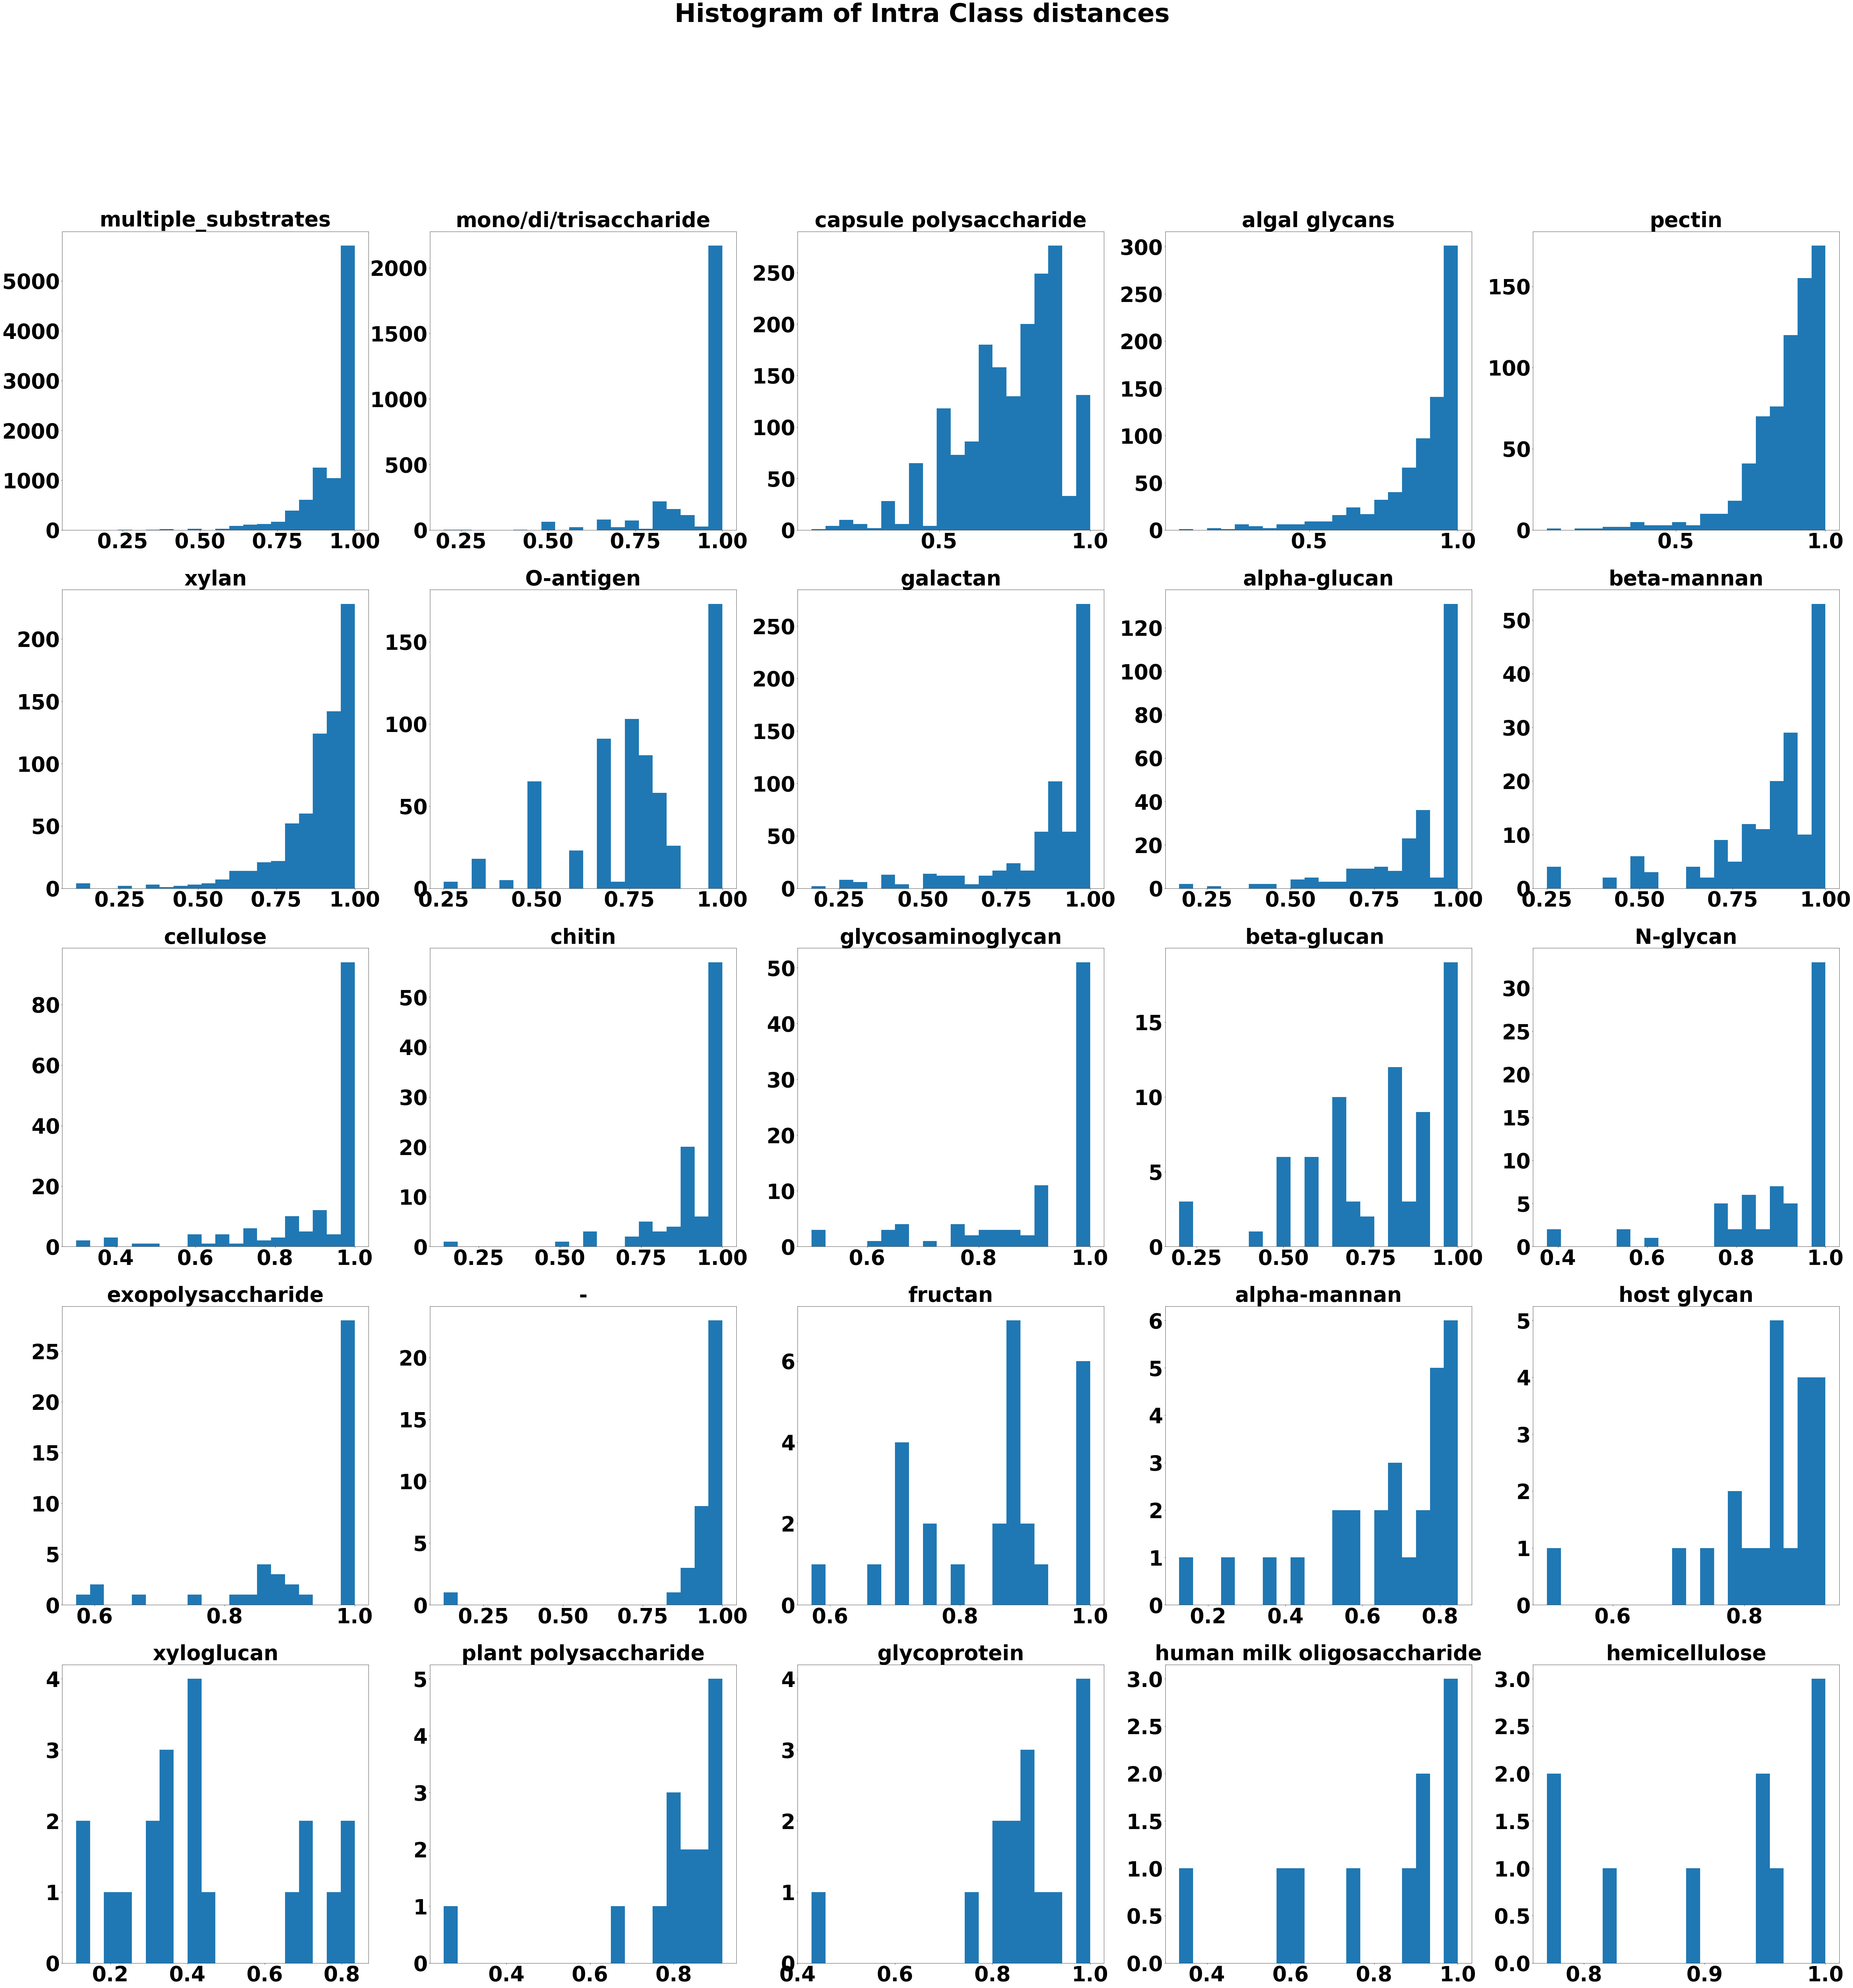

In [124]:
fig, axs = plt.subplots(5,5, figsize=(100, 100))
axs = axs.ravel()
counter = 0
for substr in data["high_level_substr"].value_counts().keys().tolist(): 
    if substr != "O-glycan":
#         print(substr)
#         sns.kdeplot(variation_gene_composition(substr), ax = axs[counter])
        axs[counter].hist(variation_gene_composition(substr), bins = 20)
        axs[counter].set_title(substr, fontweight="bold", size=65)
        counter += 1
plt.suptitle("Histogram of Intra Class distances", fontweight="bold", size=80)
plt.show()

In [125]:
fig.savefig(r"D://Gene_Project//multi_histogram.png")

In [126]:
catch = []
for substr in data["high_level_substr"].value_counts().keys().tolist(): 
#     print(substr)
#     print(scipy.stats.skew(variation_gene_composition(substr)))
    catch.append([substr, scipy.stats.skew(variation_gene_composition(substr))])

In [127]:
skewness_data = pd.DataFrame(catch)

In [128]:
skewness_data.columns = ["high_level_substr", "skewness"]

In [129]:
skewness_data.to_csv("D://Gene_Project//skewness_data.csv", index = False)

In [130]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

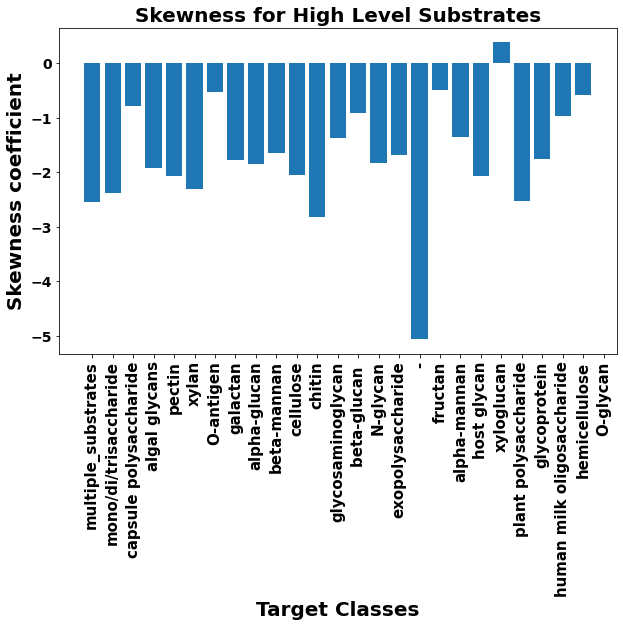

In [131]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(skewness_data["high_level_substr"], skewness_data["skewness"], align='center')
# put the labels but rotate them
plt.xticks(rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Skewness coefficient", weight = "bold", fontsize = 20)
# put the title
plt.title("Skewness for High Level Substrates", weight = "bold", fontsize = 20)
plt.show()

In [132]:
from sklearn.multiclass import OneVsRestClassifier

In [133]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [134]:
clf = OneVsRestClassifier(BalancedRandomForestClassifier())

In [135]:
clf

OneVsRestClassifier(estimator=BalancedRandomForestClassifier())

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
from sklearn.pipeline import Pipeline

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
vectorizer = CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','), lowercase = False)

In [140]:
# pipeline
clf = Pipeline([('vectorizers',vectorizer),
                ('rf',OneVsRestClassifier(BalancedRandomForestClassifier()))])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
'rf__estimator__n_estimators': [100]
# 'rf__n_estimators': [100,200,400], 
# 'rf__max_features': ["auto", "log2"]
}

In [141]:
current_classes = [classes if classes == "multiple_substrates" else "other" for classes in data["high_level_substr"]]

In [142]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [143]:
f1_scorer = make_scorer(f1_score, pos_label="multiple_substrates")

In [144]:
search = GridSearchCV(clf, param_grid, n_jobs=6 , verbose = 3, cv = 5, scoring = f1_scorer, error_score = "raise")

In [145]:
search.fit(data["sig_gene_seq"], current_classes)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorizers',
                                        CountVectorizer(lowercase=False,
                                                        tokenizer=<function <lambda> at 0x000002A9AC681670>)),
                                       ('rf',
                                        OneVsRestClassifier(estimator=BalancedRandomForestClassifier()))]),
             n_jobs=6, param_grid={'rf__estimator__n_estimators': [100]},
             scoring=make_scorer(f1_score, pos_label=multiple_substrates),
             verbose=3)

In [146]:
catch = []
for substr in data["high_level_substr"].value_counts().keys().tolist(): 
    if substr != "O-glycan":
        current_classes = [classes if classes == substr else "other" for classes in data["high_level_substr"]]
        f1_scorer = make_scorer(f1_score, pos_label=substr)
        search = GridSearchCV(clf, param_grid, n_jobs=6 , verbose = 0, cv = 5, scoring = f1_scorer)
        search.fit(data["sig_gene_seq"], current_classes)
        catch.append({"high_level_substr": substr, "5-fold-average-f1": search.best_score_})
#         print({"high_level_substr": substr, "5-fold-average-auc": search.best_score_})

In [147]:
f1_df = pd.DataFrame(catch)

In [148]:
combo_df = pd.merge(skewness_data, f1_df, how = "inner", on = "high_level_substr").merge(std_len_df).merge(unique_df).merge(std_len_df)

In [149]:
combo_df.to_csv("D://Gene_Project//accuracy.csv", index = False)

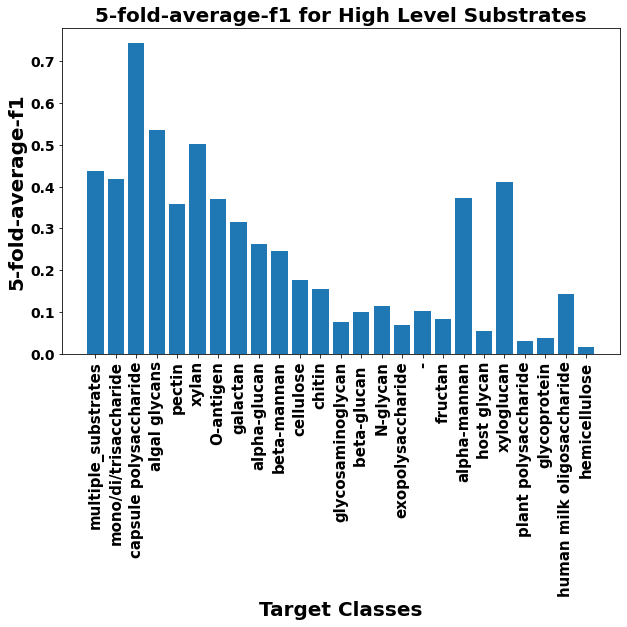

In [164]:
# define the plotting area
plt.figure(figsize = (10,6))
# need a bar plot
plt.bar(combo_df["high_level_substr"], combo_df["5-fold-average-f1"], align='center')
# put the labels but rotate them
plt.xticks(rotation = 90, weight = "bold")
# increase the ticks on y
plt.yticks(fontsize=14)
# give labels to x
plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("5-fold-average-f1", weight = "bold", fontsize = 20)
# put the title
plt.title("5-fold-average-f1 for High Level Substrates", weight = "bold", fontsize = 20)
plt.show()

In [170]:
combo_df = combo_df[["high_level_substr", "skewness", "std_length", "number_unique", "5-fold-average-f1"]]

In [171]:
combo_df.head()

high_level_substr  skewness  std_length  number_unique  \
0     multiple_substrates -2.541803    5.563306             73   
1   mono/di/trisaccharide -2.384020    3.861143             24   
2  capsule polysaccharide -0.790961    2.468960              1   
3           algal glycans -1.927239    7.285347              5   
4                  pectin -2.058754    9.269783              5   

   5-fold-average-f1  
0           0.436592  
1           0.418116  
2           0.742972  
3           0.534128  
4           0.359199

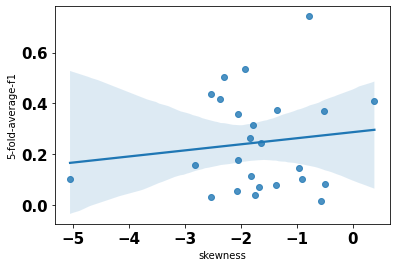

In [159]:
sns.regplot("skewness", "5-fold-average-f1", data = combo_df)
plt.show()

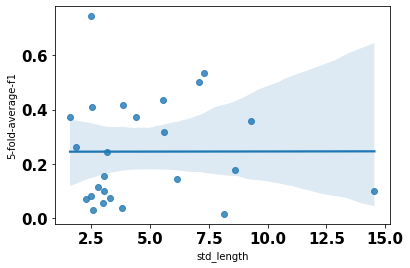

In [160]:
sns.regplot(combo_df["std_length"], combo_df["5-fold-average-f1"])
plt.show()

<AxesSubplot:xlabel='number_unique', ylabel='5-fold-average-f1'>

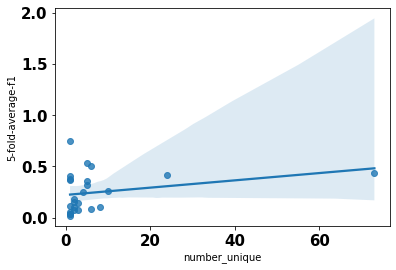

In [161]:
sns.regplot(combo_df["number_unique"], combo_df["5-fold-average-f1"])

In [187]:
# low level distribution for multiple substrates and mono/di/trisaccharide

In [174]:
low_level_ones = data[data["high_level_substr"].isin(['multiple_substrates', 'mono/di/trisaccharide'])]["low_level_substr"].value_counts()[:4]

In [182]:
low_level_ones

O-glycan,N-glycan    21
cellobiose           14
sucrose              12
lactose              11
Name: low_level_substr, dtype: int64

In [196]:
catch = []
for substr in low_level_ones.keys().tolist(): 
    if substr != "O-glycan":
        current_classes = [classes if classes == substr else "other" for classes in data["low_level_substr"]]
        f1_scorer = make_scorer(f1_score, pos_label=substr)
        search = GridSearchCV(clf, param_grid, n_jobs=6 , verbose = 0, cv = 5, scoring = f1_scorer)
        search.fit(data["sig_gene_seq"], current_classes)
        catch.append({"low_level_substr": substr, "5-fold-average-f1": search.best_score_})
#         print({"high_level_substr": substr, "5-fold-average-auc": search.best_score_})

In [197]:
pd.DataFrame(catch)

low_level_substr  5-fold-average-f1
0  O-glycan,N-glycan           0.530964
1         cellobiose           0.255359
2            sucrose           0.095925
3            lactose           0.075385

In [ ]:
# def variation_gene_composition(substr): 
#     data_substr = data_with_features[data_with_features["high_level_substr"] == substr].iloc[:,1:]
#     distance_matrix = pairwise_distances(np.array(data_substr), metric = "jaccard")
#     pca = PCA()
#     pca.fit(distance_matrix)
#     explained_var = pca.explained_variance_ratio_
#     return explained_var[:10]

In [ ]:
# print(variation_gene_composition("multiple_substrates"))

In [ ]:
# print(variation_gene_composition("xylan"))

In [ ]:
# catch = []
# for substr in D.keys(): 
#     explained_var = variation_gene_composition(substr)[0]
#     catch.append([substr, explained_var])

In [ ]:
# dominant_eigenvalue = pd.DataFrame(catch)

In [ ]:
# dominant_eigenvalue.columns = ["high_level_substr", "explained_var"]

In [ ]:
# dominant_eigenvalue.to_csv("dominant_eigen.csv", index = False)

In [ ]:
# # define the plotting area
# plt.figure(figsize = (10,6))
# # need a bar plot
# plt.bar(range(len(dominant_eigenvalue)), list(dominant_eigenvalue["explained_var"]), align='center')
# # put the labels but rotate them
# plt.xticks(range(len(dominant_eigenvalue)), list(dominant_eigenvalue["high_level_substr"]), rotation = 90, weight = "bold")
# # increase the ticks on y
# plt.yticks(fontsize=14)
# # give labels to x
# plt.xlabel("Target Classes", weight = "bold", fontsize = 20)
# # give labels to y
# plt.ylabel("Percentage variation", weight = "bold", fontsize = 20)
# # put the title
# plt.title("Percentage variation in gene composition explained by the dominant eigenvector", weight = "bold", fontsize = 20)
# plt.show()